**Introduction**

This notebook explores different functionalities of the pandas library. 

In [2]:
#Creating a dataframe to store the passenger data of the Titanic

import pandas as pd
df = pd.DataFrame(
    {'Name' : [
        'Braund, Mr. Owen Harris',
        'Allen, Mr. William Henry',
        'Bonnell, Miss. Elizabeth'
        ],
    'Age' : [22,35,58],
    'Sex' : ['Male', 'Male', 'Female']


    }

)
print(df.head()) #each column in a dataframe is a series

#Extracting a single column from a dataframe

df['Age'] #a pandas series has no column labels as it is a single column of a dataframe. It does have row labels. 


                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    Male
1  Allen, Mr. William Henry   35    Male
2  Bonnell, Miss. Elizabeth   58  Female


0    22
1    35
2    58
Name: Age, dtype: int64

In [3]:
#Creating a series from scratch

ages = pd.Series([21,22,23], name = 'Age')

#Performing operation on Dataframe or Series

print(df['Age'].mean().__round__(2))

print(ages.min())

#Getting the basic statistics of the numerical data 

df.describe()


38.33
21


,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [6]:
#Reading the titanic data and storing it as a pandas dataframe

titanic = pd.read_csv('/Users/eva/Desktop/Kaggle/Pandas/Datasets/titanic.csv')

#Displaying the first 8 rows

titanic.head(8)

#Displaying the last 10 rows
titanic.tail(10)

#Checking how pandas interpreted each of the column datatype

titanic.dtypes #displays data attribute, is not a function and therefore, does not require parenthesis


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#Extracting the titanic dataset in a csv format
#titanic.to_excel('titanic.xlsx', sheet_name= 'Passenger', engine = 'xlsxwriter')

#Getting a technical summary of the dataframe

titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Selecting a subset of the dataframe

ages = titanic[['Age']] #one dimensional object, hence a series. If multiple columns were selected, it would be a 2D object i.e a dataframe with rows and columns.
#double brackets - dataframe
#Checking the type of the output

type(ages)
ages.shape #since it's a series, it returns a tuple with the length of the dataframe


# #Selecting multiple columns

age_sex = titanic[['Age', 'Sex']] #outer brackets-selecting data from a dataframe; inner brackets - Python list
age_sex
type(age_sex)
age_sex.shape

#Filtering specific rows from a dataframe

above_35  = titanic[titanic['Age']> 35] #filtering rows #use condition inside the selection brackets []. Only returns values of the dataframe that are True for the condition. 

titanic['Age'] > 35

above_35.shape



(217, 12)

In [9]:
#Passengers from cabin class 2 and 3 - using isin() conditional function which returns a boolean value for each row based on the condition
class_23 = titanic[titanic['Pclass'].isin([2,3])]

age_known = titanic[titanic['Age'].notna()]
display(age_known)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Selecting specific rows and columns from a DataFrame
#Selecting the names of the passengers who are 35 years or older

adult_names = titanic.loc[titanic['Age'] > 35,'Name'] # the part before the comma is the rows you want, the part after the comma is the rows you select.
titanic

#Selecting 10 rows and 25 columns
titanic.iloc[9:25, 2:5] #indexing for rows and columns starts from 0[inclusive,exclusive]

#changes the first 3 rows of the name column to anonymous. Directly modifies the dataframe
titanic.iloc[0:3, 3] = "anonymous"

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Creating plots in Pandas**

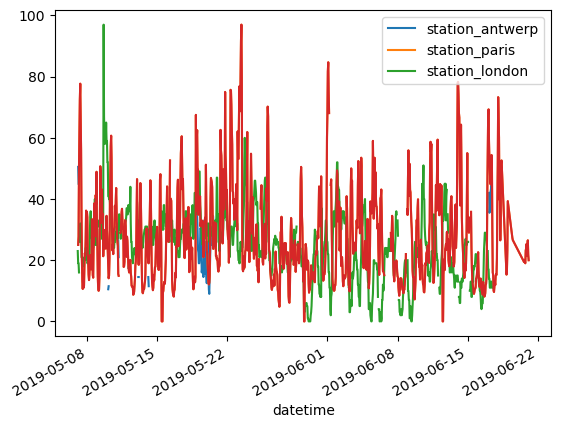

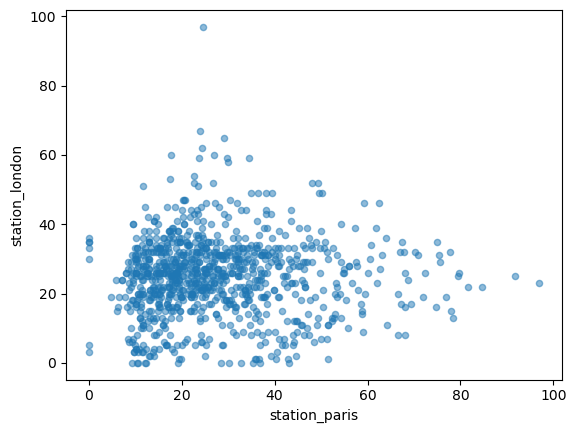

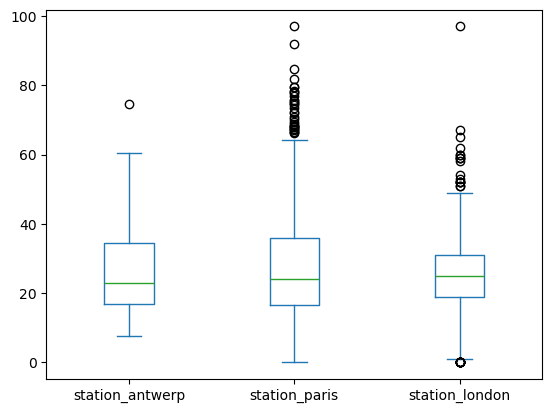

In [12]:
import matplotlib.pyplot as plt

air_quality = pd.read_csv('/Users/eva/Desktop/Kaggle/Pandas/Datasets/air_quality_no2.csv', index_col = 0, parse_dates = True)

#Plotting air quality data

air_quality.plot()

#Each of the plot objects created by pandas is a matplotlib object
#Plotting air quality of Paris

air_quality['station_paris'].plot()

#Scatterplot

air_quality.plot.scatter(x = 'station_paris', y = 'station_london', alpha =0.5)

air_quality.plot.box()

plt.show()


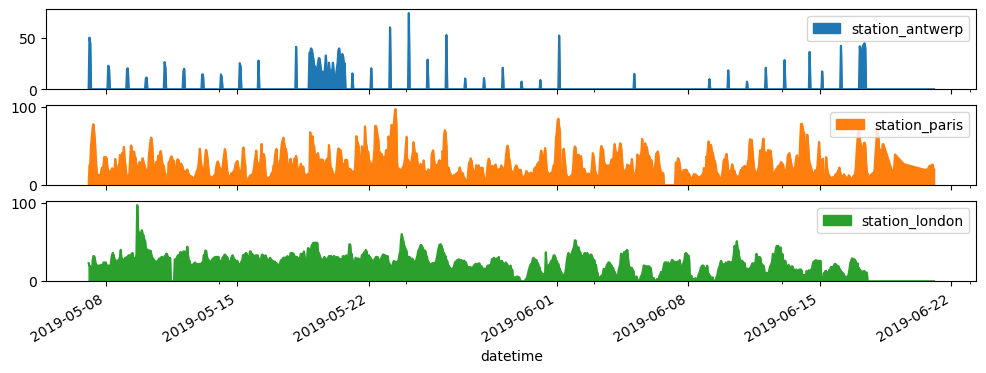

In [13]:
#Creating subplots

air_quality.plot.area(figsize = (12,4), subplots= True)

plt.show()



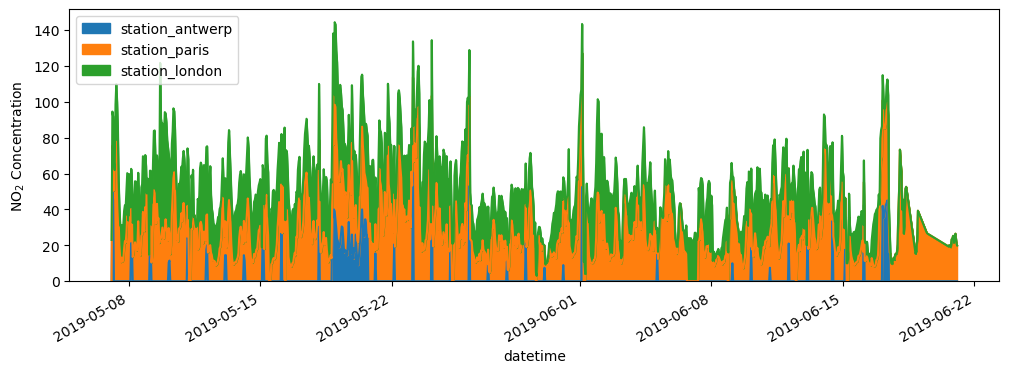

In [14]:
fig,ax = plt.subplots(figsize = (12,4))
air_quality.plot.area(ax = ax)
ax.set_ylabel('NO$_2$ Concentration ')
plt.show()

**Creating New Columns Derived from Existing Columns**

In [15]:
air_quality.head()
air_quality['station_london_mg/m3'] = air_quality['station_london'] * 1.882
air_quality.rename(columns = {'station_london_mg/m3': 'london_mg_per_cubic'}, inplace = True)

#pandas operations are applied to the entire column at once, without needing a for-loop to process each row individually
air_quality

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN


In [16]:
#Checking the ratio of the values in Paris vs Antwerp

air_quality['ratio_paris_antwerp'] = air_quality['station_paris']/air_quality['station_antwerp']
air_quality

#Renaming the data columns to the corresponding station identifiers used by OpenAQ

air_quality_renamed = air_quality.rename(columns = {
    'station_antwerp' : 'BETR801',
    'station_paris' : 'FR04014',
    'station_london':'London Westminster'
})

air_quality_renamed = air_quality_renamed.rename(columns = str.lower)
air_quality_renamed


,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN


**Calculating Summary Statistics**

In [19]:

print(titanic['Age'].mean().__round__(2)) #mean age

print(titanic[['Age','Fare']].median().__round__(2)) #median age and fare rounded to two digits

titanic[['Age', 'Fare']].describe()

#Specific combinations of aggregating statistics for Age and Fare
titanic.agg(
    {'Age': ['min', 'max', 'median', 'skew'],
     'Fare': ['min', 'max', 'median', 'mean']}
)

#Aggregating Statistics grouped by category

titanic[['Sex', 'Age']].groupby('Sex').mean() #mean age grouped by Sex

##Alternatively,

titanic.groupby('Sex')['Age'].mean()

titanic.groupby('Sex').mean(numeric_only = True) #mean  of numeric columns grouped by Sex

#Mean ticket fare price for each of the sex and cabin class combinations

titanic.groupby(['Sex', 'Pclass'])['Fare'].mean()

#Number of passengers in each passenger class
titanic.groupby('Pclass')['PassengerId'].count()

'''
Both size and count can be used in combination with groupby.Whereas size INCLUDES NaN values and just provides the 
number of rows(size of the table), count EXCLUDES the missing values. 
'''

##Alternatively,

titanic['Pclass'].value_counts().dropna()

29.7
Age     28.00
Fare    14.45
dtype: float64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Reshaping the ;ayout of tables**



'In case of pivot, the data is only rearranged. When multiple values need to be aggregated(eg. the value on different time steps),\npivot_table can be used'

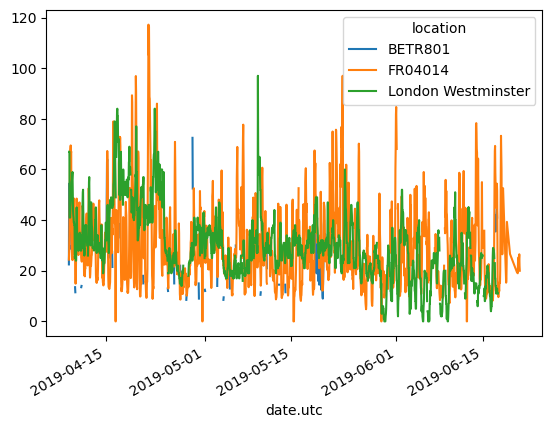

In [50]:
air_quality = pd.read_csv('/Users/eva/Desktop/Kaggle/Pandas/Datasets/air_quality_long.csv', index_col = 'date.utc', parse_dates = True)

#sorting titanic data according to the age of the passengers

titanic.sort_values(by = ['Age']).head()

#sorting by cabin class and age in descending order

titanic.sort_values(by = ['Pclass', 'Age'], ascending = False)

#using a small subset of the air quality data, focusing only on the No2 data

no2 = air_quality[air_quality['parameter'] == 'no2']

no2_subset = no2.sort_index().groupby(["location"]).head(2) 

no2_subset
#first sorts the dataframe by its index
#groups the dataframe by the location column
#selects the first 2 rows for each location group
#without head(2), just creates a groupby object which you can iterate over, apply aggregation functions, or transform the data further


#listing the 3 stations next to each other as columns with their values

no2_subset.pivot(columns = 'location', values = 'value')

#Plotting of different time series at the same time using plot

no2.pivot(columns = 'location', values = 'value').plot()

#Mean concentrations for No2 and PM2.5 in each of the stations in table form

air_quality.pivot_table(index = 'location', columns = 'parameter', values = 'value', aggfunc = 'mean', margins = True)

'''In case of pivot, the data is only rearranged. When multiple values need to be aggregated(eg. the value on different time steps),
pivot_table can be used'''
    